In [1]:
# Remember to update your path
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/rz14/Documents/QR_Qishi/QishiQR/')

from pathlib import Path

from Backtesting.Vectorized.cross_compare import *
from Backtesting.Vectorized.models import *

from Utils.lm import gen_strategy, LM_model

import json
import warnings
warnings.filterwarnings(action='ignore')

# ====== Initial Configuration ========

try:
    with open('config.json','r') as f:
        config = json.load(f)
except:
    print("Failed to find the configuration file.")
        
DATA_DIR = config['Tick path']
OUTPUT_DIR = config['Output path']
Strategy_DIR = config['Strategy path']

model_order = config['Max model order']
number_of_states = config['State number']
freq = config['Frequency']
offset = config['Offset']
tca = None

# Major Contract
Major contract of Bu is 1606, 1609, 1612


## Build strategy

In [2]:
def generate_explist(top_dir='', commodity):
    

In [49]:
ASSET = 'bu'
ASSET_PATH = Path(config['Output path'], ASSET)
ASSET_PATH.mkdir(exist_ok=True, parents=True)


    

commodity = ASSET
exp_list = ['1601', '1602', '1603', '1604', '1605', '1606', '1607', '1608', '1609', '1610', '1611', '1612',
 '1701', '1702', '1703', '1704', '1705', '1706', '1709', '1712', '1803', '1806', '1809', '1812']

exp_list = ['1601', '1602', '1603', '1604', '1605', '1606', '1607', '1608', '1609', '1610', '1611', '1612',
 '1701', '1702', '1703', '1704', '1705', '1706', '1709', '1712', '1803', '1806', '1809', '1812']




# === Main Routine ===
try:
    strategy = pd.read_csv(Strategy_DIR+'{}_5min_Stra.csv'.format(ASSET))
    slm = strategy[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index()
    slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
except:
    strategy = gen_strategy(commodity, exp_list, number_of_states, model_order, data_root_dir=DATA_DIR, output=OUTPUT_DIR)
    strategy.to_csv(Strategy_DIR+'{}_5min_Stra.csv'.format(ASSET),index=False)
    slm = strategy[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index()
    slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)

0min
============bu train============
----------Running:1601----------
----------Running:1602----------
----------Running:1603----------
----------Running:1604----------
----------Running:1605----------
----------Running:1606----------
----------Running:1607----------
----------Running:1608----------
----------Running:1609----------
----------Running:1610----------
----------Running:1611----------
----------Running:1612----------
----------Running:1701----------
----------Running:1702----------
----------Running:1703----------
----------Running:1704----------
----------Running:1705----------
----------Running:1706----------
----------Running:1709----------
----------Running:1712----------
----------Running:1803----------
----------Running:1806----------
----------Running:1809----------
----------Running:1812----------
1min
============bu train============
----------Running:1601----------
----------Running:1602----------
----------Running:1603----------
----------Running:1604----------


In [50]:
slm.head()

move,prior,0,1,2,total,signal
0,p,472073,70500,74003,616576,0
1,p0,415923,27137,28931,471991,0
2,p00,384012,15181,16657,415850,0
3,p000,361503,10560,11877,383940,0
4,p0000,343734,8301,9396,361431,0


## Bu 1612 Test - No cost

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
1,0.356918,-0.001453,-0.004720,0.002479,-0.000056,-0.056051,0.030071,-0.185483,0.525349,-1.017428,886,0.950613,0.357788
2,0.320401,0.001021,-0.004597,0.002422,0.000039,-0.051867,0.030071,-0.134854,0.526895,0.796847,901,1.034722,0.352941
3,0.382969,-0.001553,-0.005015,0.002250,-0.000059,-0.056051,0.016998,-0.170952,0.448746,-1.013720,899,0.947202,0.380423
4,0.392566,0.001270,-0.004737,0.002377,0.000054,-0.051867,0.016998,-0.120646,0.501788,0.808863,800,1.043184,0.431250


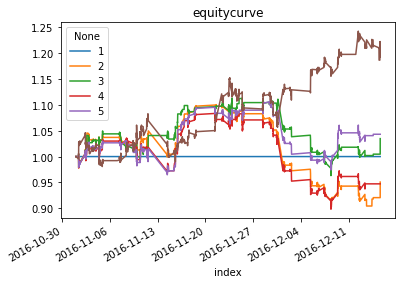

In [53]:
from Backtesting.Vectorized.models import OneContractTest
start = '20161101'
end = '20161231'
max_order=5
tcas = ['None']*max_order
test1 = OneContractTest(DATA_DIR, OUTPUT_DIR, slm)
test1.build('bu', '1612', max_order, freq, offset, start, end, tcas)
test1.run()

test1.plot()
test1.results[0]['benchmark'].plot()
test1.performance

# Bu 1612 Test - Fixed Cost

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
1,0.352280,-0.005010,-0.002615,0.002442,-0.000192,-0.056411,0.029951,-0.247691,0.933941,-3.555556,886,0.829653,0.344244
2,0.315030,-0.002399,-0.002442,0.002383,-0.000091,-0.052107,0.029951,-0.178888,0.975819,-1.903596,901,0.918442,0.339623
3,0.375523,-0.005601,-0.002612,0.002220,-0.000212,-0.056411,0.016518,-0.237080,0.849999,-3.728888,899,0.809562,0.362625
4,0.384700,-0.002884,-0.002999,0.002322,-0.000123,-0.052107,0.016518,-0.172679,0.774330,-1.874183,800,0.901944,0.413750


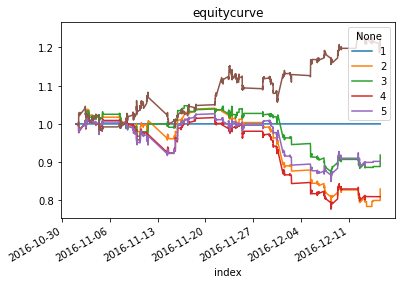

In [54]:
start = '20161101'
end = '20161231'
max_order=5
tcas = ['Fixed']*max_order
test2 = OneContractTest(DATA_DIR, OUTPUT_DIR, slm)
test2.build('bu', '1612', max_order, freq, offset, start, end, tcas)
test2.run()

test2.plot(target_col='equitycurve')
ax=plt.gca()
test2.results[0]['benchmark'].plot()
test2.performance

In [38]:
test2.results[0]

,InstrumentID,Date,TimeStamp,LastPrice,HighPrice,LowPrice,Volume,Turnover,AccVolume,AccTurnover,...,Direction,prior,signal,tradeID,return,signal_bar,strategy,benchmark,equitycurve,drawdown
index,,,,,,,,,,,,,,,,,,,,,
2016-11-01 09:05:00,rb1701,20161101.0,1.477962e+12,2591.0,2627.0,2570.0,14.0,362700.0,1709114.0,4.438134e+10,...,0,p,0,1,0.000000,0,0.000000,1.000000,1.000000,0.000000
2016-11-01 09:10:00,rb1701,20161101.0,1.477963e+12,2587.0,2627.0,2570.0,18.0,465660.0,1796518.0,4.664196e+10,...,1,p0,0,1,-0.001545,0,-0.000000,0.998455,1.000000,0.000000
2016-11-01 09:15:00,rb1701,20161101.0,1.477963e+12,2577.0,2627.0,2570.0,520.0,13396180.0,1891112.0,4.908235e+10,...,1,p1,2,2,-0.003873,1,-0.003993,0.994582,0.996007,-0.003993
2016-11-01 09:20:00,rb1701,20161101.0,1.477963e+12,2584.0,2627.0,2570.0,4.0,103340.0,1954682.0,5.072328e+10,...,2,p1,2,2,0.002713,1,0.002593,0.997295,0.998600,-0.001400
2016-11-01 09:25:00,rb1701,20161101.0,1.477964e+12,2578.0,2627.0,2570.0,70.0,1804660.0,2004966.0,5.202029e+10,...,1,p2,1,3,-0.002325,-1,0.002205,0.994970,1.000804,0.000000
2016-11-01 09:30:00,rb1701,20161101.0,1.477964e+12,2575.0,2627.0,2570.0,94.0,2421060.0,2056012.0,5.333661e+10,...,1,p1,2,4,-0.001164,1,-0.001284,0.993806,0.999520,-0.001283
2016-11-01 09:35:00,rb1701,20161101.0,1.477964e+12,2569.0,2627.0,2568.0,306.0,7861160.0,2162616.0,5.608125e+10,...,1,p1,2,4,-0.002333,1,-0.002453,0.991473,0.997067,-0.003734
2016-11-01 09:40:00,rb1701,20161101.0,1.477964e+12,2570.0,2627.0,2563.0,148.0,3803580.0,2277270.0,5.902617e+10,...,2,p1,2,4,0.000389,1,0.000269,0.991862,0.997336,-0.003465
2016-11-01 09:45:00,rb1701,20161101.0,1.477965e+12,2576.0,2627.0,2563.0,60.0,1545440.0,2329002.0,6.035733e+10,...,2,p2,1,5,0.002332,-1,-0.002452,0.994194,0.994884,-0.005915


# Bu 1612 Test Different frequency

In [60]:
start = '20161101'
end = '20161231'
max_order=5
freqs = ['{}min'.format(i) for i in range(1, 5)]
tcas = ['Fixed']*max_order

test5 = MultiFrequencyTest(DATA_DIR, OUTPUT_DIR, slm)
test5.build('bu', '1612', max_order, freqs, offset, start, end, tcas)
test5.run()

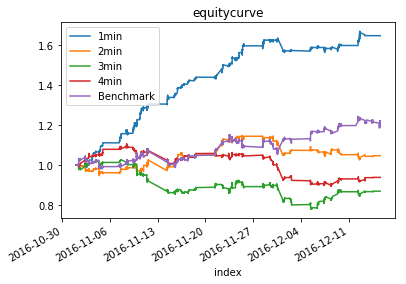

In [61]:
test5.plot(target_col='equitycurve')
ax=plt.gca()
test5.results[0]['benchmark'].plot()
test5.performance
plt.legend([i for i in freqs]+['Benchmark'])

In [66]:
test5.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.363147,0.023131,-0.001191,0.001380,0.000170,-0.035661,0.028179,-0.038106,1.158675,15.924315,5861,1.994654,0.420577
1,0.385490,0.005599,-0.001879,0.001636,0.000080,-0.052106,0.022074,-0.143992,0.870886,3.631323,2997,1.240772,0.454454
2,0.388768,0.000977,-0.002406,0.001888,0.000021,-0.042320,0.022074,-0.122475,0.784812,0.628129,1997,1.042002,0.459690
3,0.372543,-0.003501,-0.002713,0.002084,-0.000099,-0.039718,0.024592,-0.256430,0.768051,-2.349220,1520,0.849468,0.438158


# Bu 1706 No cost

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
1,0.334821,-0.003423,-0.003945,0.002274,-0.000108,-0.040180,0.026412,-0.209830,0.576462,-2.556057,1357,0.852799,0.372881
2,0.277007,-0.000833,-0.003980,0.002284,-0.000025,-0.040180,0.015253,-0.106525,0.573955,-0.752168,1417,0.964163,0.357798
3,0.308431,-0.002679,-0.004501,0.002190,-0.000085,-0.037608,0.026412,-0.224886,0.486682,-2.171091,1363,0.884823,0.418195
4,0.304255,-0.003413,-0.004582,0.002216,-0.000124,-0.037608,0.015253,-0.226005,0.483634,-2.804647,1186,0.853228,0.465430


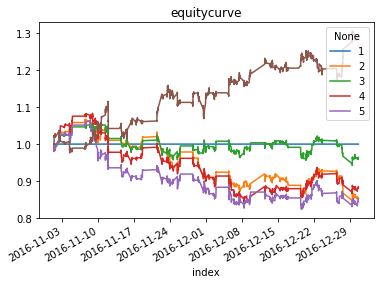

In [62]:
start = '20161101'
end = '20161231'
max_order=5
tcas = ['None']*max_order

test3 = OneContractTest(DATA_DIR, OUTPUT_DIR, slm)
test3.build('bu', '1706', max_order, freq, offset, start, end, tcas)
test3.run()

test3.plot(target_col='equitycurve')
ax=plt.gca()
test3.results[0]['benchmark'].plot()
test3.performance

## bu 1706 Fixed Cost

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
1,0.336902,-0.008011,-0.002642,0.002241,-0.000254,-0.040540,0.026292,-0.380497,0.848370,-5.944742,1357,0.655519,0.356669
2,0.276515,-0.005246,-0.002523,0.002227,-0.000159,-0.040540,0.015013,-0.267127,0.882847,-4.742522,1417,0.774443,0.345801
3,0.317164,-0.008051,-0.002940,0.002115,-0.000254,-0.038088,0.026292,-0.393793,0.719635,-6.345785,1363,0.653823,0.404989
4,0.312090,-0.008889,-0.003564,0.002127,-0.000322,-0.038088,0.015013,-0.424168,0.596925,-7.120274,1186,0.617788,0.450253


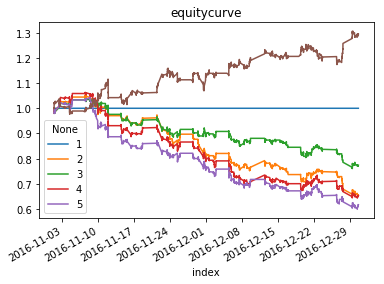

In [63]:
start = '20161101'
end = '20161231'
max_order=5
tcas = ['Fixed']*max_order
test4 = OneContractTest(DATA_DIR, OUTPUT_DIR, slm)
test4.build('bu', '1706', max_order, freq, offset, start, end, tcas)
test4.run()

test4.plot(target_col='equitycurve')
ax=plt.gca()
test4.results[0]['benchmark'].plot()
test4.performance

## bu 1706 different frequency
The SLM stragety is of 5-min frequency.
Check the time dependence.

In [64]:
start = '20161101'
end = '20161231'
max_order=5
freqs = ['{}min'.format(i) for i in range(1, 5)]
tcas = ['Fixed']*max_order

test5 = MultiFrequencyTest(DATA_DIR, OUTPUT_DIR, slm)
test5.build('bu', '1706', max_order, freqs, offset, start, end, tcas)
test5.run()

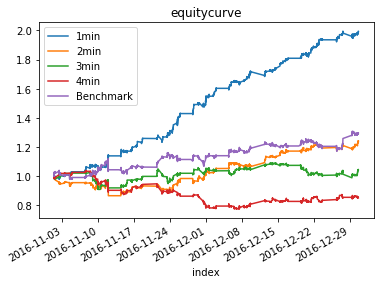

In [65]:
test5.plot(target_col='equitycurve')
ax=plt.gca()
test5.results[0]['benchmark'].plot()
test5.performance
plt.legend([i for i in freqs]+['Benchmark'])

# Results for minor contracts

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.411164,0.007241,-0.002265,0.002911,0.000167,-0.029983,0.033431,-0.099441,1.285219,4.402468,1908,1.318584,0.352201
1,0.447561,0.005721,-0.003926,0.002938,0.000177,-0.039807,0.033431,-0.183259,0.748489,3.195577,1423,1.251718,0.524947
2,0.447011,0.005795,-0.003930,0.002936,0.000179,-0.039807,0.033431,-0.181306,0.747172,3.241103,1423,1.254990,0.525650
3,0.441770,0.005778,-0.003144,0.002937,0.000159,-0.029983,0.033431,-0.153884,0.934097,3.270004,1603,1.254248,0.436681
4,0.447946,0.003686,-0.003256,0.002950,0.000106,-0.030433,0.033431,-0.165579,0.905921,2.057185,1523,1.162185,0.434012


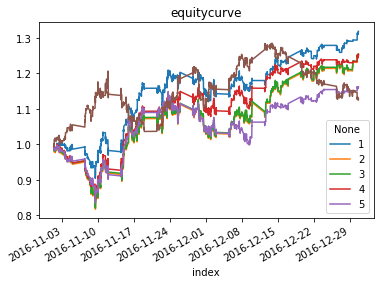

In [43]:
start = '20161101'
end = '20161231'
max_order=5
tcas = ['Fixed']*max_order
test6 = OneContractTest(DATA_DIR, OUTPUT_DIR, slm)
test6.build('rb', '1702', max_order, freq, offset, start, end, tcas)
test6.run()

test6.plot(target_col='equitycurve')
ax=plt.gca()
test6.results[0]['benchmark'].plot()
test6.performance

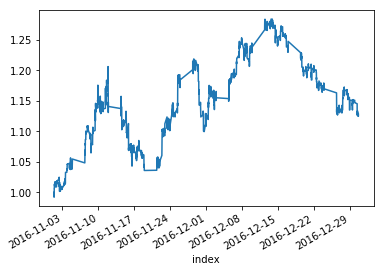

In [44]:
test6.results[0]['benchmark'].plot()

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.291347,-0.003508,-0.001658,0.003830,-0.000103,-0.05907,0.024344,-0.259138,2.309591,-3.010321,1505,0.845639,0.160797
1,0.399816,-0.004377,-0.002977,0.003929,-0.000172,-0.05907,0.024344,-0.372349,1.319938,-2.737057,1120,0.807400,0.268750
2,0.399387,-0.004330,-0.002972,0.003929,-0.000170,-0.05907,0.024344,-0.371389,1.321934,-2.710455,1120,0.809476,0.268750
3,0.366495,-0.002949,-0.002082,0.004052,-0.000102,-0.05907,0.024344,-0.279145,1.945706,-2.011433,1278,0.870256,0.191706
4,0.378500,-0.004624,-0.002158,0.003857,-0.000175,-0.05907,0.024344,-0.346137,1.787048,-3.054386,1164,0.796529,0.190722


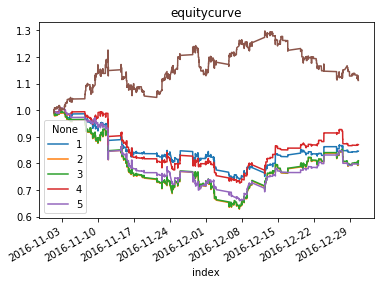

In [45]:
start = '20161101'
end = '20161231'
max_order=5
tcas = ['Fixed']*max_order
test6 = OneContractTest(DATA_DIR, OUTPUT_DIR, slm)
test6.build('rb', '1703', max_order, freq, offset, start, end, tcas)
test6.run()

test6.plot(target_col='equitycurve')
ax=plt.gca()
test6.results[0]['benchmark'].plot()
test6.performance

# Check correlations

In [108]:
from Utils.IOUtils import df_reader

instrument_a = 'rb1705'
commodity = 'rb'
data_path = DATA_DIR+'/rb'
offset = 0
freq = ['1min','5min','10min']
data = [df_reader(instrument_a + '*', topdir=data_path + '/day',
                 offset=offset, freq=f,day=True, symbol=commodity).get_tick(raw=False) for f in freq]

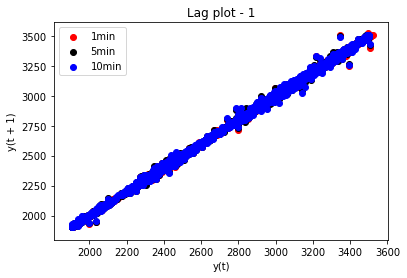

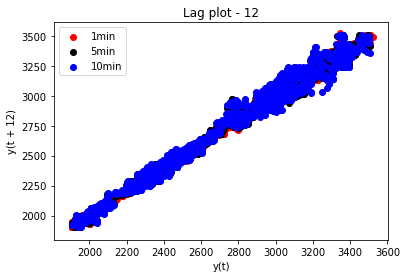

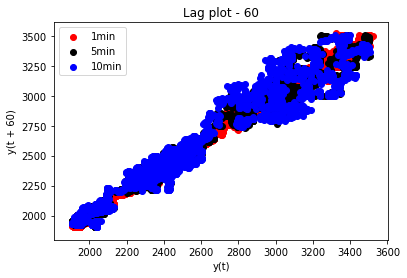

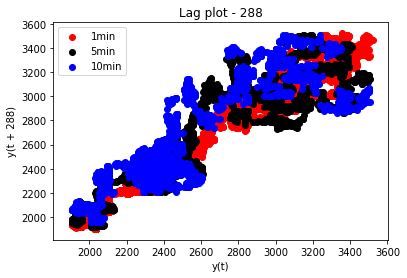

In [124]:
from pandas.tools.plotting import lag_plot,autocorrelation_plot
from datetime import timedelta
color=['r','k','b']
for lg in [1,int(timedelta(hours=1)/timedelta(minutes=5)),
           int(timedelta(hours=5)/timedelta(minutes=5)),int(timedelta(hours=24)/timedelta(minutes=5))]:
    for i, d in enumerate(data):
        lag_plot(d['LastPrice'],lg,c=color[i])
    plt.legend([
        '1min','5min','10min'
    ])
    plt.title('Lag plot - {}'.format(lg))
    plt.show()

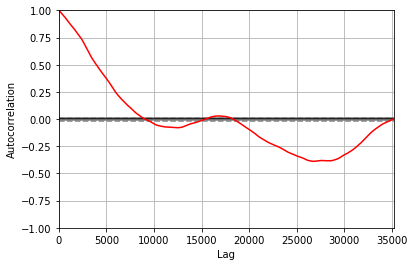

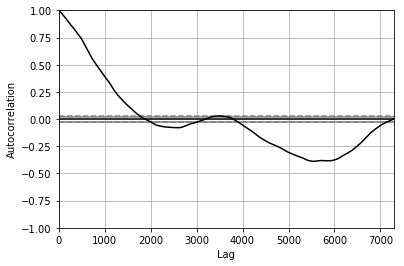

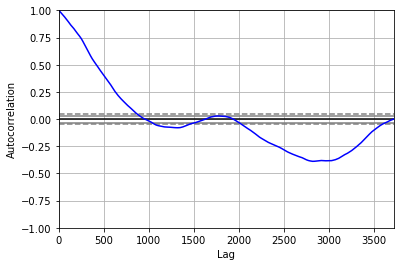

In [119]:
for i, d in enumerate(data):
    autocorrelation_plot(d['LastPrice'],c=color[i])
    plt.show()

In [96]:
from Utils.IOUtils import df_reader

instrument_a = 'ag1705'
commodity = 'ag'
data_path = DATA_DIR+commodity
offset = 0
freq = '5min'
data = df_reader(instrument_a + '*', topdir=data_path + '/day',
                 offset=offset, freq=freq,day=True, symbol=commodity).get_tick(raw=False)

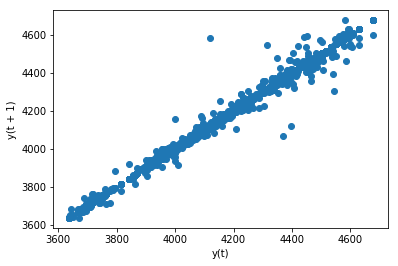

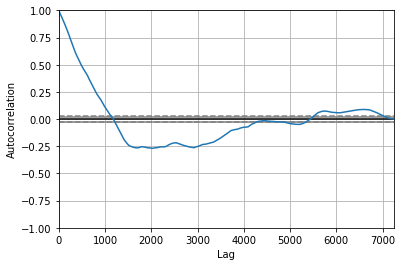

In [97]:
lag_plot(data['LastPrice'])
plt.show()
autocorrelation_plot((data['LastPrice']))
plt.show()

In [100]:
data

,InstrumentID,Date,TimeStamp,LastPrice,HighPrice,LowPrice,Volume,Turnover,AccVolume,AccTurnover,...,BidVolume1,BidVolume2,BidVolume3,BidVolume4,BidVolume5,Type,AveragePrice,UpperLimitPrice,LowerLimitPrice,UpdateTime
2016-05-17 09:05:00,ag1705,20160517.0,1.463447e+12,3856.0,3909.0,3856.0,0.0,0.0,28.0,1625040.0,...,2.0,0.0,0.0,0.0,0.0,-1.0,3869.0,4355.0,3422.0,09:04:33.000
2016-05-17 09:10:00,ag1705,20160517.0,1.463447e+12,3856.0,3909.0,3856.0,0.0,0.0,28.0,1625040.0,...,2.0,0.0,0.0,0.0,0.0,-1.0,3869.0,4355.0,3422.0,09:07:57.000
2016-05-17 09:15:00,ag1705,20160517.0,1.463448e+12,3841.0,3909.0,3841.0,4.0,230460.0,32.0,1855500.0,...,5.0,0.0,0.0,0.0,0.0,-1.0,3865.0,4355.0,3422.0,09:13:54.000
2016-05-17 09:20:00,ag1705,20160517.0,1.463448e+12,3841.0,3909.0,3841.0,0.0,0.0,32.0,1855500.0,...,5.0,0.0,0.0,0.0,0.0,-1.0,3865.0,4355.0,3422.0,09:19:34.000
2016-05-17 09:25:00,ag1705,20160517.0,1.463448e+12,3841.0,3909.0,3841.0,0.0,0.0,32.0,1855500.0,...,5.0,0.0,0.0,0.0,0.0,-1.0,3865.0,4355.0,3422.0,09:22:34.500
2016-05-17 09:30:00,ag1705,20160517.0,1.463449e+12,3841.0,3909.0,3841.0,0.0,0.0,32.0,1855500.0,...,8.0,0.0,0.0,0.0,0.0,-1.0,3865.0,4355.0,3422.0,09:29:47.500
2016-05-17 09:35:00,ag1705,20160517.0,1.463449e+12,3841.0,3909.0,3841.0,0.0,0.0,32.0,1855500.0,...,13.0,0.0,0.0,0.0,0.0,-1.0,3865.0,4355.0,3422.0,09:34:44.000
2016-05-17 09:40:00,ag1705,20160517.0,1.463449e+12,3841.0,3909.0,3841.0,0.0,0.0,32.0,1855500.0,...,13.0,0.0,0.0,0.0,0.0,-1.0,3865.0,4355.0,3422.0,09:37:36.500
2016-05-17 09:45:00,ag1705,20160517.0,1.463449e+12,3841.0,3909.0,3841.0,0.0,0.0,32.0,1855500.0,...,13.0,0.0,0.0,0.0,0.0,-1.0,3865.0,4355.0,3422.0,09:43:38.000
2016-05-17 09:50:00,ag1705,20160517.0,1.463450e+12,3841.0,3909.0,3841.0,0.0,0.0,32.0,1855500.0,...,6.0,0.0,0.0,0.0,0.0,-1.0,3865.0,4355.0,3422.0,09:49:39.000
